In [6]:
import io
import pandas as pd
table = pd.read_csv(io.StringIO('''
Age,Gender,Native,Education
21-25,Female,Yes,Bachelor
21-25,Male,Yes,High School
21-25,Male,Yes,Bachelor
21-25,Male,Yes,High School
21-25,Male,Yes,High School
26-30,Male,Yes,Bachelor
26-30,Male,Yes,Post Grad
21-25,Male,Yes,High School
26-30,Female,Yes,Bachelor
21-25,Female,Yes,Post Grad
21-25,Female,Yes,Post Grad
21-25,Female,Yes,High School
18-20,Female,Yes,High School
18-20,Female,Yes,High School
21-25,Female,Yes,High School
21-25,Female,Yes,High School
21-25,Female,Yes,High School
21-25,Male,Yes,High School
21-25,Female,Yes,High School
21-25,Male,Yes,High School
21-25,Female,Yes,High School
18-20,Female,Yes,High School
21-25,Female,Yes,High School
41-45,Male,Yes,Bachelor
31-35,Female,Yes,Bachelor
46-50,Female,Yes,High School
41-45,Female,Yes,Bachelor
41-45,Female,Yes,High School
'''), header=0)


In [7]:
table

,Age,Gender,Native,Education
0,21-25,Female,Yes,Bachelor
1,21-25,Male,Yes,High School
2,21-25,Male,Yes,Bachelor
3,21-25,Male,Yes,High School
4,21-25,Male,Yes,High School
5,26-30,Male,Yes,Bachelor
6,26-30,Male,Yes,Post Grad
7,21-25,Male,Yes,High School
8,26-30,Female,Yes,Bachelor
9,21-25,Female,Yes,Post Grad


In [8]:
# prompt: select each column to a list

age_list = table['Age'].tolist()
gender_list = table['Gender'].tolist()
native_list = table['Native'].tolist()
education_list = table['Education'].tolist()

print("Age List:", age_list)
print("Gender List:", gender_list)
print("Native List:", native_list)
print("Education List:", education_list)



Age List: ['21-25', '21-25', '21-25', '21-25', '21-25', '26-30', '26-30', '21-25', '26-30', '21-25', '21-25', '21-25', '18-20', '18-20', '21-25', '21-25', '21-25', '21-25', '21-25', '21-25', '21-25', '18-20', '21-25', '41-45', '31-35', '46-50', '41-45', '41-45']
Gender List: ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female']
Native List: ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
Education List: ['Bachelor', 'High School', 'Bachelor', 'High School', 'High School', 'Bachelor', 'Post Grad', 'High School', 'Bachelor', 'Post Grad', 'Post Grad', 'High School', 'High School', 'High School', 'High School', 'High School', 'High School',

In [10]:
# prompt: for each column, count for each category, and save it in a dictionary

column_counts = {}

for col in table.columns:
  column_counts[col] = table[col].value_counts().to_dict()

column_counts


{'Age': {'21-25': 17,
  '26-30': 3,
  '18-20': 3,
  '41-45': 3,
  '31-35': 1,
  '46-50': 1},
 'Gender': {'Female': 18, 'Male': 10},
 'Native': {'Yes': 28},
 'Education': {'High School': 18, 'Bachelor': 7, 'Post Grad': 3}}

In [62]:
# prompt: merge the age in the count dict into three categories: "Age<35", "Age(35-45)", "Age(>45)"

def categorize_age(age_range):
  start_age = int(age_range.split('-')[0])
  if start_age < 35:
    return "Age<35"
  elif 35 <= start_age <= 45:
    return "Age(35-45)"
  else:
    return "Age(>45)"

categorized_age_counts = {}
for age_range, count in column_counts['Age'].items():
  category = categorize_age(age_range)
  if category not in categorized_age_counts:
    categorized_age_counts[category] = 0
  categorized_age_counts[category] += count

column_counts['Age'] = categorized_age_counts

column_counts

{'Age': {'Age<35': 24, 'Age(35-45)': 3, 'Age(>45)': 1},
 'Gender': {'Female': 18, 'Male': 10},
 'Native': {'Yes': 28},
 'Education': {'High School': 18, 'Bachelor': 7, 'Post Grad': 3},
 'AgeCategory': {'Age<35': 24, 'Age(35-45)': 3, 'Age(>45)': 1}}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


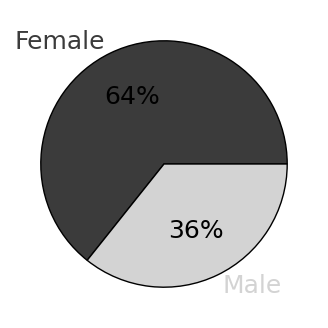

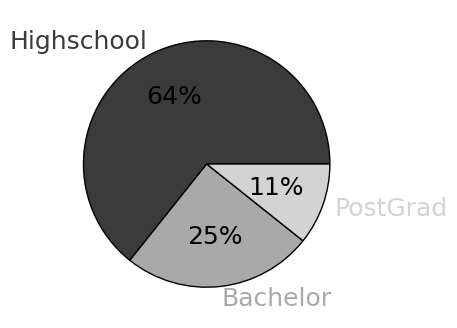

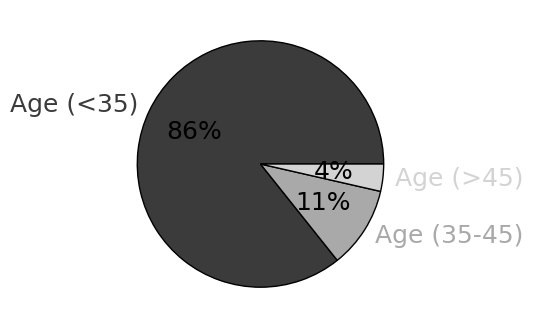

In [63]:
from google.colab import drive
import os
import re
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
from colour import Color
import json
#!pip install colour
from matplotlib import font_manager as fm, rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ROOT='''/content/drive/MyDrive/Colab Notebooks/googledrive/turing_online/'''
fpath_arial = "/content/drive/MyDrive/arial/ARIAL.TTF"
fpath_arialbold =  "/content/drive/MyDrive/arial/ARIALBD.TTF"
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)
startColor = Color('#6495ED') #light blue
EndColor = Color("#00008B") #dark blue

# key = 'inlab' #choose from these choices: inlab, mturk, prolific
# folderpath = './plots/Task3_' + key + '_' #for saving the plots

#data: a list containing counts of each bin
#labels: for each data bin
#startcolor: fixed; do NOT change, always start from light blue
#endcolor: fixed; do NOT change, always end with dark blue
def plot_PieCharts(data, labels, startcolor, endcolor, demoinfor):

    #label must have same lengths as data
    #normalize the list of data so that sum is 1
    datanorm = [float(i)/sum(data) for i in data]
    labels_actual = []
    for i, item in enumerate(datanorm):
        labels_actual.append( labels[i] )

    # colors = list(startColor.range_to(EndColor,len(datanorm)))
    colorlist =  ['#3b3b3b','darkgrey','lightgrey'] if len(datanorm) >= 3 else  ['#3b3b3b','lightgrey']
    #print(colorlist)
    plt.subplots(figsize=(4,4))
    widges, labeltexts, autotexts = plt.pie(datanorm, labels = labels_actual, colors = colorlist, startangle = 0,autopct='%1.0f%%',wedgeprops={"edgecolor":'black',"linewidth":1.0},textprops={'fontsize': 18,'fontfamily': 'sans-serif'})

    plt.savefig(ROOT + demoinfor + '_DemorDistri.eps', format='eps', bbox_inches='tight')
    plt.savefig(ROOT + demoinfor + '_DemorDistri.pdf', bbox_inches='tight')
    for i,labeltext in enumerate(labeltexts):
        labeltext.set_color(colorlist[i])
    for i,autotext in enumerate(autotexts):
        autotext.set_horizontalalignment('center')
        autotext.set_verticalalignment('center')

    plt.show()



# #load the pre-compiled results
# f = open("./savedResults/Task3_" + key + "_demorStats.json")
# condition_numSubjs = json.load(f)

# # choose condition

# condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']

# #age bins
# demoinfor = 'age'
# agelist = np.array([condition_numSubjs['ageL35'],condition_numSubjs['ageG35L45'],condition_numSubjs['ageG45']]) #number of counts within a bin
# mylabels = ["Age<35", "Age(35-45)", "Age(>45)"]
# plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)

#gender bins
demoinfor = 'gender'
# agelist = np.array([condition_numSubjs['F'], condition_numSubjs['M']]) #number of counts within a bin
agelist = np.array([column_counts['Gender']['Female'],column_counts['Gender']['Male']])
mylabels = ["Female", "Male"]
plot_PieCharts(agelist, mylabels, startColor, EndColor, demoinfor)


demoinfor = 'education'
# agelist = np.array([condition_numSubjs['F'], condition_numSubjs['M']]) #number of counts within a bin
agelist = np.array([column_counts['Education']['High School'],column_counts['Education']['Bachelor'],column_counts['Education']['Post Grad']])
mylabels = ["Highschool", "Bachelor","PostGrad"]
plot_PieCharts(agelist, mylabels, startColor, EndColor, demoinfor)

demoinfor = 'age'
# agelist = np.array([condition_numSubjs['F'], condition_numSubjs['M']]) #number of counts within a bin
agelist = np.array([column_counts['AgeCategory']['Age<35'],column_counts['AgeCategory']['Age(35-45)'],column_counts['AgeCategory']['Age(>45)']])
mylabels = ["Age (<35)", "Age (35-45)","Age (>45)"]
plot_PieCharts(agelist, mylabels, startColor, EndColor, demoinfor)

# #age bins
# demoinfor = 'education'
# agelist = np.array([condition_numSubjs['school'], condition_numSubjs['bachelor'], condition_numSubjs['postgrad']]) #number of counts within a bin
# mylabels = ["Middle/High","Bachelor","PostGrad"]
# plot_PieCharts(agelist, mylabels, startColor, EndColor, demoinfor)

